### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
df = pd.read_csv("usuarios_win_mac_lin.csv")
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [3]:
X = df[['paginas', 'acciones', 'valor',
       'clase']]
X

,paginas,acciones,valor,clase
0,2,4,8,2
1,2,6,6,2
2,2,4,4,2
3,3,6,12,2
4,2,6,12,2
...,...,...,...,...
165,1,7,42,0
166,1,2,6,0
167,1,3,9,0
168,1,7,28,0


In [4]:
y = df['duracion']
y

0        7.0
1       21.0
2       57.0
3      101.0
4      109.0
       ...  
165     13.0
166     12.0
167     13.0
168     13.0
169     12.0
Name: duracion, Length: 170, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [7]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
paginas,35.941133
acciones,4.338612
valor,-1.075448
clase,34.501963


In [12]:
#El score es muy bajo, por lo que tiene muy poco acierto
lm.score(X, y) * 100

9.691560457284732

In [15]:
predictions = lm.predict(X)

In [17]:
#El RSME tiene un valor muy alto para los valores con los que se estudia
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

RMSE: 191.82610379924077


<AxesSubplot:>

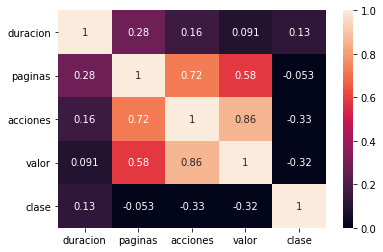

In [22]:
#Las correlaciones con "duración", son extremadamente bajas, por ese motivo, la probabilidad de acierto, también lo és. Por lo tanto, presenta coherencia.
sns.heatmap(df.corr(),vmin=0, vmax=1,annot=True)

In [ ]:
#No es un buen método, la regresión, porque los valores se encuentran muy dispersos en los ejes X,y. Factor que provoca que al generar una regresión lineal, el error sea muy elevado y por lo tanto, el porcentaje de acierto, muy bajo.